In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from culc_dist import getNearbyStationName, getNearbyStation, inSad

# Получение данных
<em>Данные можно скачать от здесь - https://www.kaggle.com/code/ekaterinadranitsyna/russian-housing-evaluation-model<em>

In [3]:
df = pd.read_csv("/Users/superponny/PycharmProjects/stats_KDZ/prepare-data/all_v2.csv")

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df.columns

Index(['price', 'date', 'time', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type'],
      dtype='object')

In [6]:
df.shape

(5477006, 13)

In [7]:
df.sample(10)

price        date      time    geo_lat    geo_lon  region  \
1089517   4150000  2019-02-06  16:31:57  55.565981  38.230535      81   
1938293   1450000  2019-06-05  14:04:28  55.012840  83.001886    9654   
4283589   1300000  2020-08-27  16:50:15  56.347760  44.184311    2871   
1994868   2650000  2019-06-14  11:47:12  55.014108  83.001661    9654   
3547308   5300000  2020-03-31  00:03:37  57.124138  65.570723    3991   
5161831   4200000  2021-03-17  09:23:40  45.053907  38.950043    2843   
5312437  14900000  2021-04-09  12:53:44  59.995557  30.330268    2661   
1686080   1800000  2019-04-26  10:59:42  55.013248  83.000609    9654   
4167927   6500000  2020-07-28  12:05:54  56.907938  60.625793    6171   
2840695   2800000  2019-11-05  17:42:15  60.150134  30.011923    2661   

         building_type  level  levels  rooms   area  kitchen_area  object_type  
1089517              1      1       9      1  41.50           6.7            1  
1938293              1      8      10     -1  39.35           5.0            1  
4283589              3      1       3      1  30.00           5.6            1  
1994868              1      6      10      1  48.02          14.0            1  
3547308              1     11      12      3  75.00          14.0            1  
5161831              4      5       9      2  54.00           9.0            1  
5312437              3      6       8      3  80.00          10.0            1  
1686080              1      1      10      1  48.94          14.0            1  
4167927              2     11      25      3  80.90          11.0            1  
2840695              1     11      25      1  36.40          11.9           11

In [8]:
a = pd.Series(df.rooms.value_counts())
a

 1     2067013
 2     1827514
 3     1097354
-1      306209
 4      152160
 5       22576
 6        2357
 7         788
 8         353
-2         343
 9         338
 10          1
Name: rooms, dtype: int64

<AxesSubplot:ylabel='rooms'>

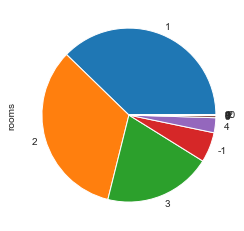

In [9]:
a.plot(kind = 'pie')

<AxesSubplot:>

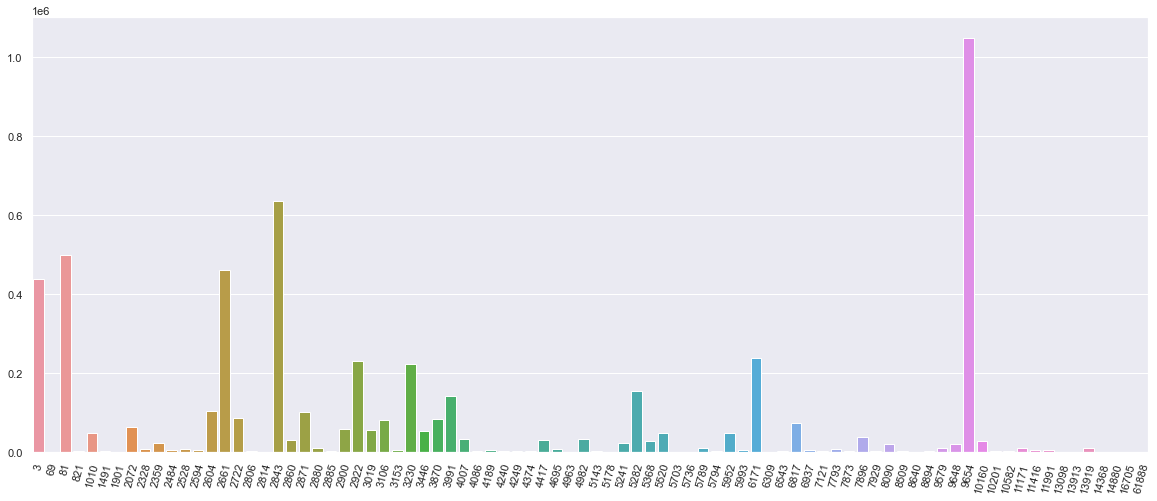

In [11]:
info = df.region.value_counts()
plt.xticks(rotation=75)
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x=df.region.value_counts().index, y=info.values)

<h3>Создание нового набора данных</h3>
    

Данные буду отбирать по ***территориальной принадлжености*** (Москва) и ***по количеству квартир*** (2)

In [12]:
df = df[(df["geo_lon"] <= 37.84241) & (df["geo_lon"] >= 37.39334)
         & (df["geo_lat"] >= 55.76421) & (df["geo_lat"] <= 55.8861)
         & (df["rooms"] == 2)]

In [13]:
df.sample(10)

price        date      time    geo_lat    geo_lon  region  \
4993781  13659360  2021-02-01  16:42:45  55.860401  37.540619       3   
3848338   6928424  2020-06-05  09:12:52  55.866539  37.393687      81   
5474988  17074200  2021-05-01  16:27:58  55.812833  37.601419       3   
2761244  10202680  2019-10-18  15:37:44  55.787590  37.495500       3   
4264832  12854240  2020-08-11  09:33:35  55.853728  37.620905       3   
2834092   9100000  2019-11-04  23:03:11  55.828526  37.428752       3   
1517669   9369212  2019-04-01  13:59:48  55.802253  37.597287       3   
5169262  17600000  2021-03-18  07:42:17  55.813946  37.599902       3   
4185863   9435927  2020-07-30  16:41:03  55.881585  37.683930       3   
4596855   8205000  2020-10-22  14:54:58  55.825430  37.696373       3   

         building_type  level  levels  rooms  area  kitchen_area  object_type  
4993781              2     14      23      2  59.7          20.7           11  
3848338              2      6      17      2  60.4          14.6           11  
5474988              2     24      32      2  66.0          21.0           11  
2761244              2     13      21      2  53.8          12.8           11  
4264832              2     11      14      2  64.4          21.9           11  
2834092              1      3      14      2  47.0          15.0            1  
1517669              2      8      11      2  48.5          10.8           11  
5169262              3      2       7      2  53.0          10.0            1  
4185863              2     16      21      2  61.4          14.0           11  
4596855              2     21      26      2  54.7           9.9           11

<AxesSubplot:>

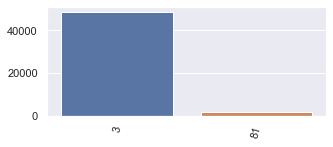

In [15]:
info = df.region.value_counts()
plt.xticks(rotation=75)
sns.set(rc = {'figure.figsize':(5,2)})
sns.barplot(x=df.region.value_counts().index, y=info.values)

<AxesSubplot:>

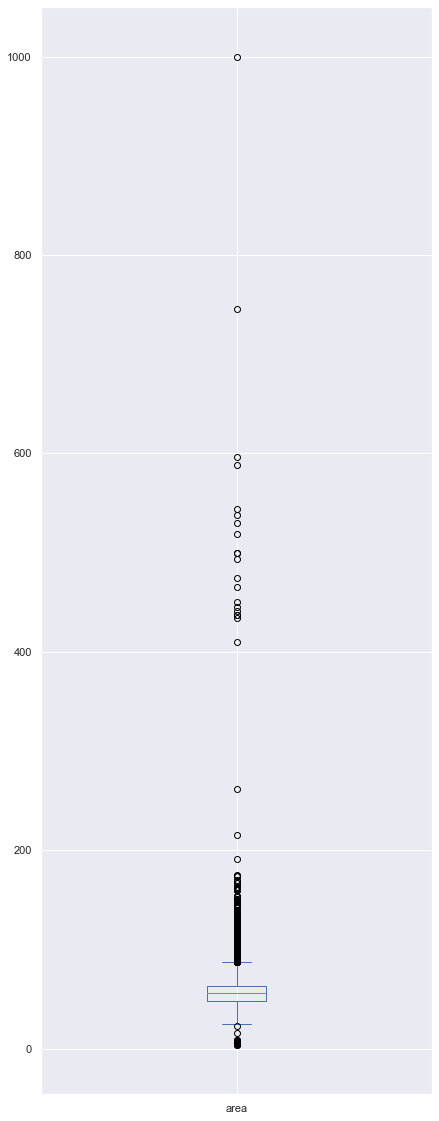

In [16]:
df['area'].plot(kind = 'box',figsize=(7,20))

Из данных о площади видно, что в выборке содержится большое количество выбросов. **Перед обучением модели их стоит убрать**.

<AxesSubplot:>

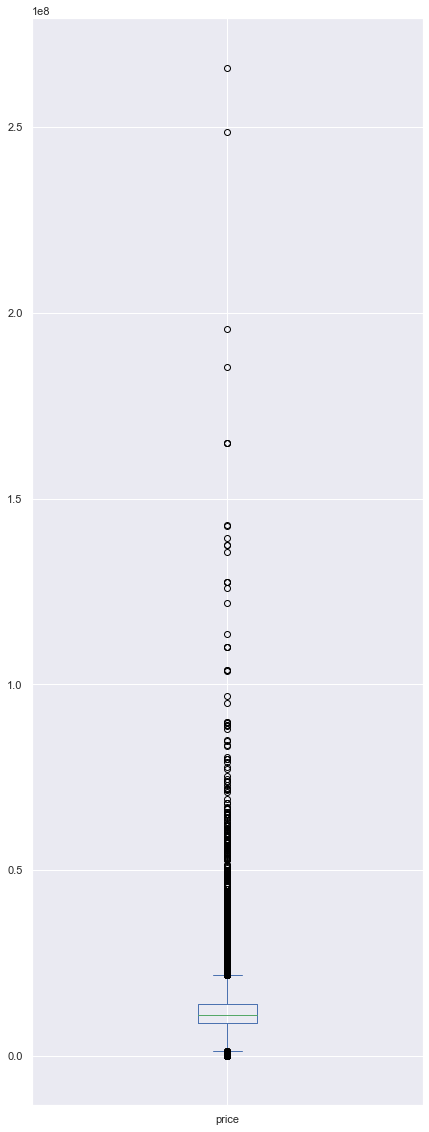

In [17]:
df['price'].plot(kind = 'box',figsize=(7,20))

Стоит также пофильтровать данные по ценам

<AxesSubplot:ylabel='building_type'>

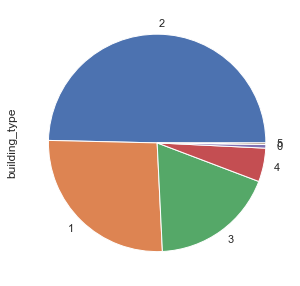

In [20]:
df['building_type'].value_counts().plot(kind = 'pie', figsize=(5,5))

Типы фасадов:

0 - Other

1 - Panel

2 - Monolithic

3 - Brick

4 - Blocky

5 - Wooden

<AxesSubplot:ylabel='object_type'>

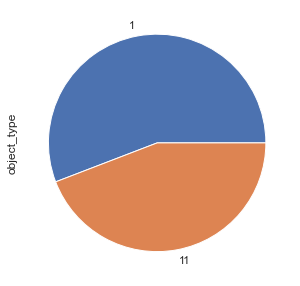

In [21]:
df['object_type'].value_counts().plot(kind = 'pie', figsize=(5,5))

Тип домов:

1 - Secondary real estate market

11 - New building


<AxesSubplot:>

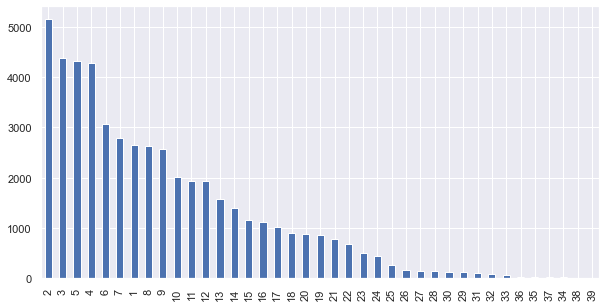

In [22]:
df['level'].value_counts().plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:>

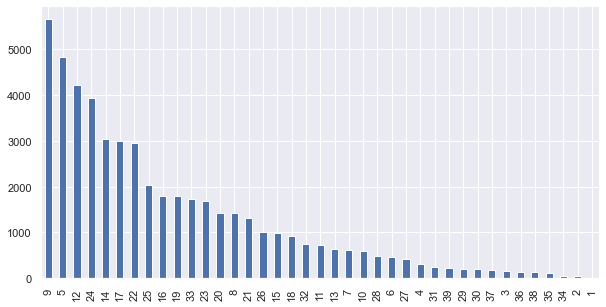

In [23]:
df['levels'].value_counts().plot(kind = 'bar', figsize=(10,5))

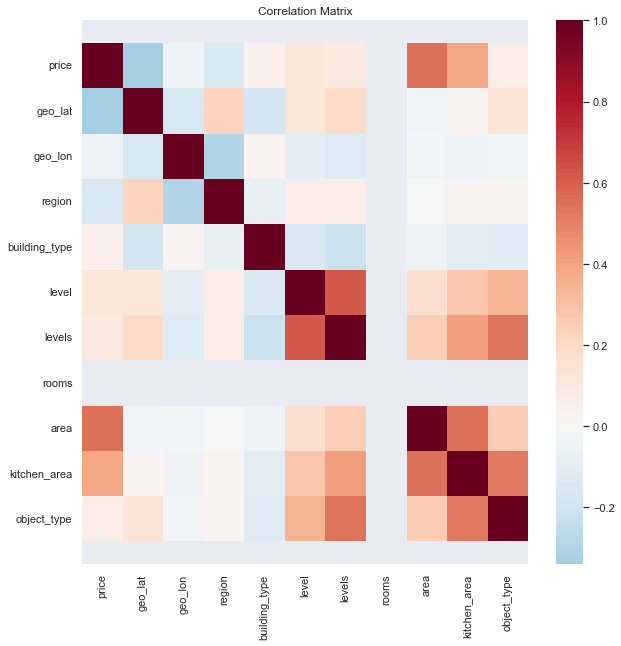

In [24]:
correlation = df.corr()
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.heatmap(correlation, center=0, cmap='RdBu_r')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='level', ylabel='price'>

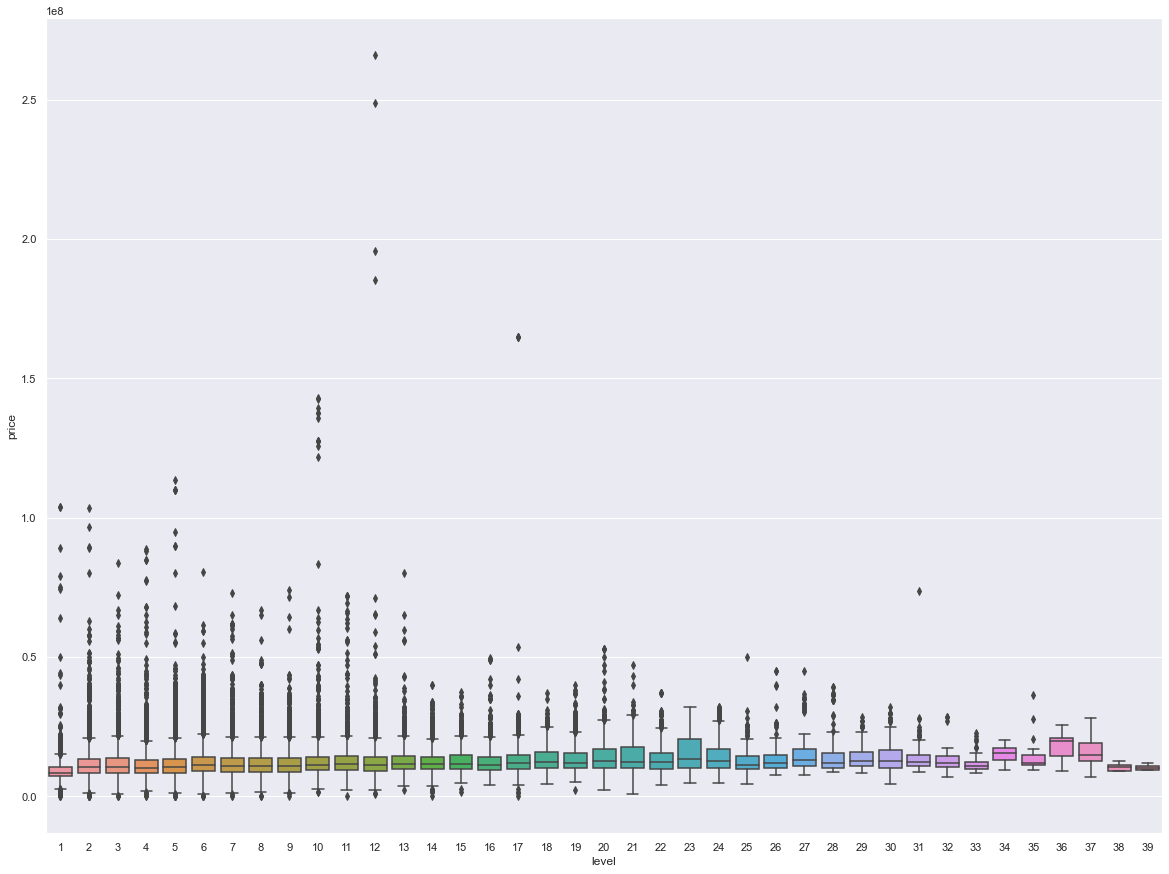

In [25]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.boxplot(x = df['level'], y = df['price'])

<AxesSubplot:xlabel='level', ylabel='price'>

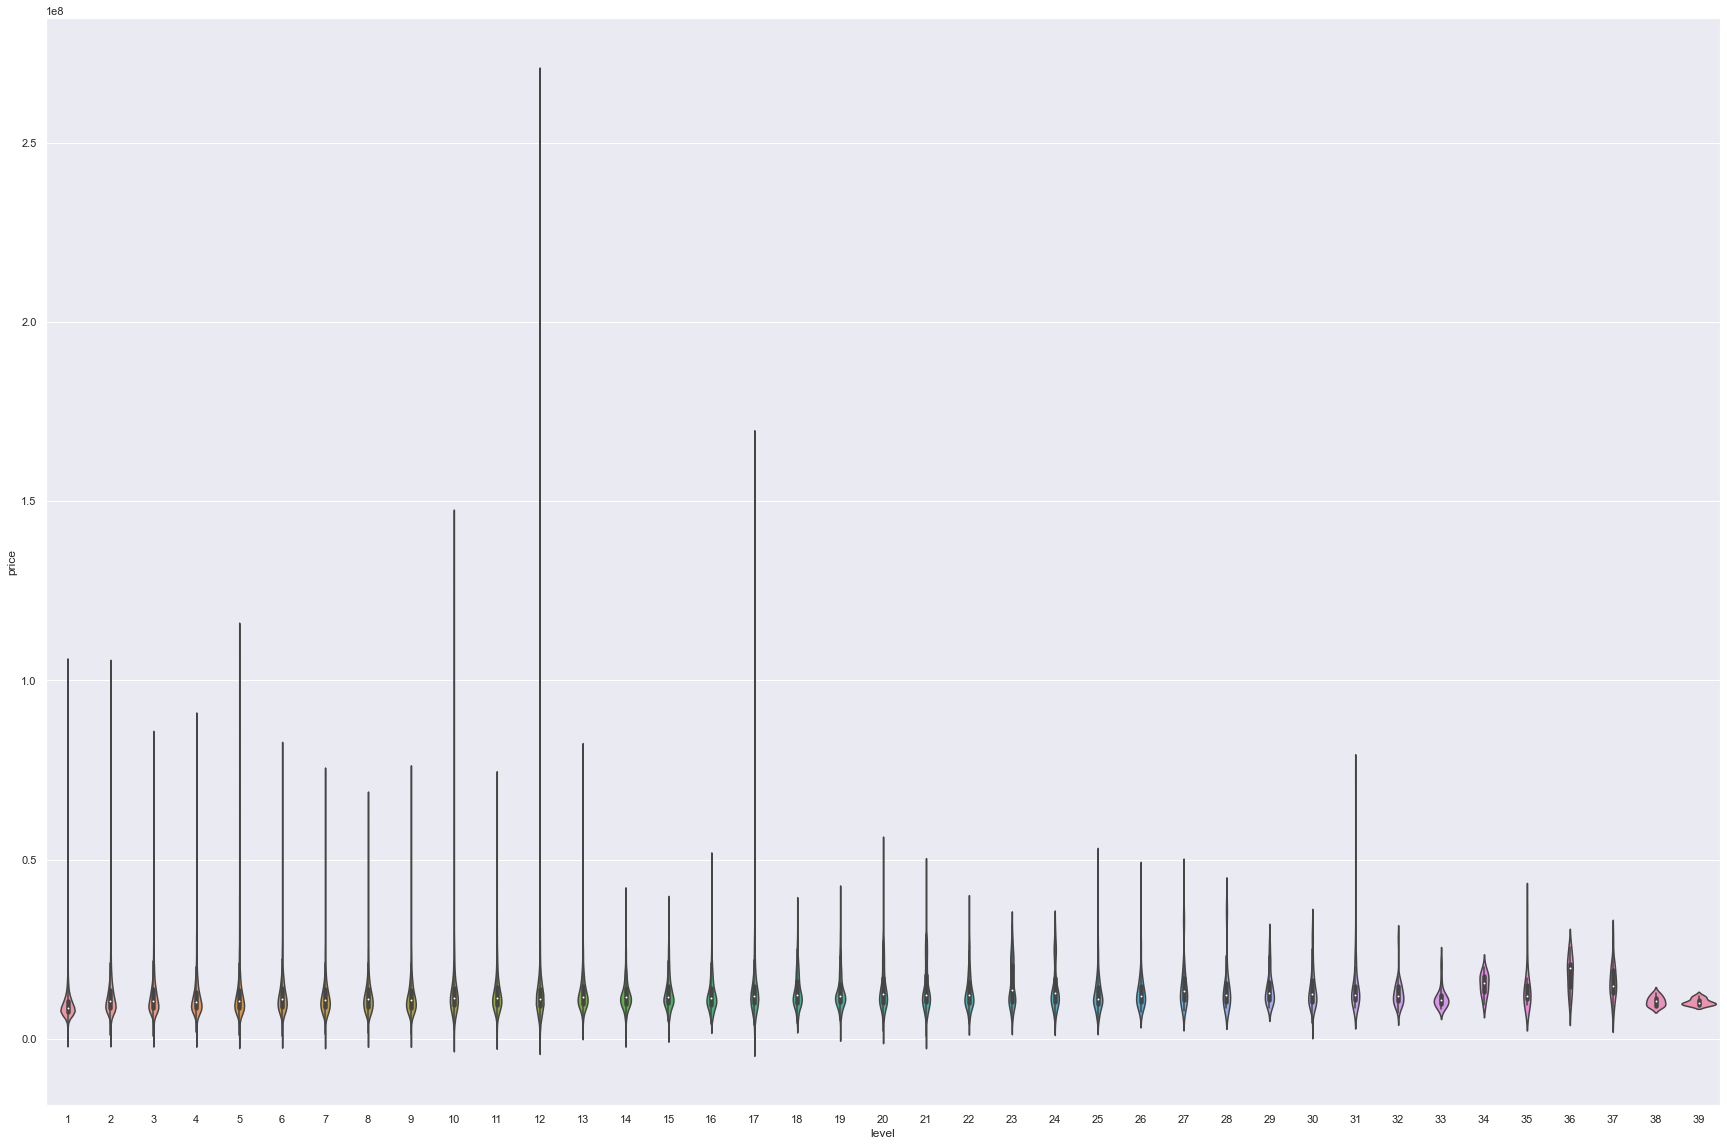

In [26]:
sns.set(rc = {'figure.figsize':(30,20)})
sns.violinplot(x = df['level'], y = df['price'])

<AxesSubplot:xlabel='object_type', ylabel='price'>

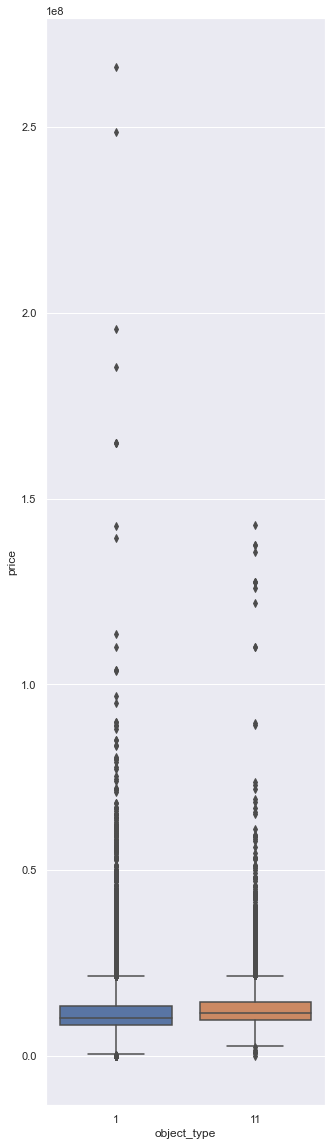

In [27]:
sns.set(rc = {'figure.figsize':(5,20)})
sns.boxplot(x = df['object_type'], y = df['price'])

# Feature Engineering

1. Произведу котегоризацию по этажей квартиры 

In [28]:
df['first floor'] = 1
df['2 <= x <= 5'] = 1
df['6 <= x <= 9'] = 1
df['10 <= x <= 12'] = 1
df['13 <= x <= 17'] = 1
df['18 <= x'] = 1
df['first floor'] = np.where((df.level != 1), 0, df['first floor'])
df['2 <= x <= 5'] = np.where((2 > df.level) | (df.level > 5), 0, df['2 <= x <= 5'])
df['6 <= x <= 9'] = np.where((6 > df.level) | (df.level > 9), 0, df['6 <= x <= 9'])
df['10 <= x <= 12'] = np.where((10 > df.level) | (df.level > 12), 0, df['10 <= x <= 12'])
df['13 <= x <= 17'] = np.where((13 > df.level) | (df.level > 17), 0, df['13 <= x <= 17'])
df['18 <= x'] = np.where((18 > df.level), 0, df['18 <= x'])

In [30]:
df.head(10)

price        date      time    geo_lat    geo_lon  region  \
150    8806100  2018-08-04  07:43:24  55.872870  37.593110       3   
384   13293000  2018-09-08  01:23:56  55.790968  37.475395       3   
1536  10600000  2018-09-08  05:41:24  55.813353  37.632791       3   
1938  14250000  2018-09-08  09:16:01  55.806940  37.646392       3   
1942  11990000  2018-09-08  09:16:59  55.808834  37.649427       3   
2039   7300000  2018-09-08  09:37:59  55.880666  37.686428       3   
2108  15990000  2018-09-08  09:52:11  55.795249  37.525945       3   
2109  19000000  2018-09-08  09:52:11  55.795249  37.525945       3   
2112  15200000  2018-09-08  09:52:11  55.809934  37.727885       3   
2298   8150000  2018-09-08  10:38:17  55.815681  37.491817       3   

      building_type  level  levels  rooms  area  kitchen_area  object_type  \
150               1      5      24      2  53.5          18.5           11   
384               2      3      14      2  64.4          14.0           11   
1536              3      2       8      2  67.0           8.0            1   
1938              2      6      12      2  69.0          13.0           11   
1942              2      3       9      2  60.0          13.0           11   
2039              3      1       9      2  50.0           7.0            1   
2108              2      8      15      2  54.4           6.0           11   
2109              2      3      15      2  74.2          13.5           11   
2112              2     20      30      2  64.0          12.0            1   
2298              3      3       3      2  49.0           8.0            1   

      first floor  2 <= x <= 5  6 <= x <= 9  10 <= x <= 12  13 <= x <= 17  \
150             0            1            0              0              0   
384             0            1            0              0              0   
1536            0            1            0              0              0   
1938            0            0            1              0              0   
1942            0            1            0              0              0   
2039            1            0            0              0              0   
2108            0            0            1              0              0   
2109            0            1            0              0              0   
2112            0            0            0              0              0   
2298            0            1            0              0              0   

      18 <= x  
150         0  
384         0  
1536        0  
1938        0  
1942        0  
2039        0  
2108        0  
2109        0  
2112        1  
2298        0

2. Проебразую количество этажей в сдании

   Сделаю новый столбец в котором в процентах будет показываться уровень от максимума на котором находиться квартира

In [31]:
df['level_prop'] = df['level']/df['levels']
df.head(10)

price        date      time    geo_lat    geo_lon  region  \
150    8806100  2018-08-04  07:43:24  55.872870  37.593110       3   
384   13293000  2018-09-08  01:23:56  55.790968  37.475395       3   
1536  10600000  2018-09-08  05:41:24  55.813353  37.632791       3   
1938  14250000  2018-09-08  09:16:01  55.806940  37.646392       3   
1942  11990000  2018-09-08  09:16:59  55.808834  37.649427       3   
2039   7300000  2018-09-08  09:37:59  55.880666  37.686428       3   
2108  15990000  2018-09-08  09:52:11  55.795249  37.525945       3   
2109  19000000  2018-09-08  09:52:11  55.795249  37.525945       3   
2112  15200000  2018-09-08  09:52:11  55.809934  37.727885       3   
2298   8150000  2018-09-08  10:38:17  55.815681  37.491817       3   

      building_type  level  levels  rooms  area  kitchen_area  object_type  \
150               1      5      24      2  53.5          18.5           11   
384               2      3      14      2  64.4          14.0           11   
1536              3      2       8      2  67.0           8.0            1   
1938              2      6      12      2  69.0          13.0           11   
1942              2      3       9      2  60.0          13.0           11   
2039              3      1       9      2  50.0           7.0            1   
2108              2      8      15      2  54.4           6.0           11   
2109              2      3      15      2  74.2          13.5           11   
2112              2     20      30      2  64.0          12.0            1   
2298              3      3       3      2  49.0           8.0            1   

      first floor  2 <= x <= 5  6 <= x <= 9  10 <= x <= 12  13 <= x <= 17  \
150             0            1            0              0              0   
384             0            1            0              0              0   
1536            0            1            0              0              0   
1938            0            0            1              0              0   
1942            0            1            0              0              0   
2039            1            0            0              0              0   
2108            0            0            1              0              0   
2109            0            1            0              0              0   
2112            0            0            0              0              0   
2298            0            1            0              0              0   

      18 <= x  level_prop  
150         0    0.208333  
384         0    0.214286  
1536        0    0.250000  
1938        0    0.500000  
1942        0    0.333333  
2039        0    0.111111  
2108        0    0.533333  
2109        0    0.200000  
2112        1    0.666667  
2298        0    1.000000

3. Категоризую столбец **object_type**

In [32]:
df['new'] = 0
df['old'] = 0
df['new'] = np.where((df.object_type == 1), 1, df['new'])
df['old'] = np.where((df.object_type == 11), 1, df['old'])
df.drop('object_type', axis = 1, inplace = True)

In [33]:
df.head(10)

price        date      time    geo_lat    geo_lon  region  \
150    8806100  2018-08-04  07:43:24  55.872870  37.593110       3   
384   13293000  2018-09-08  01:23:56  55.790968  37.475395       3   
1536  10600000  2018-09-08  05:41:24  55.813353  37.632791       3   
1938  14250000  2018-09-08  09:16:01  55.806940  37.646392       3   
1942  11990000  2018-09-08  09:16:59  55.808834  37.649427       3   
2039   7300000  2018-09-08  09:37:59  55.880666  37.686428       3   
2108  15990000  2018-09-08  09:52:11  55.795249  37.525945       3   
2109  19000000  2018-09-08  09:52:11  55.795249  37.525945       3   
2112  15200000  2018-09-08  09:52:11  55.809934  37.727885       3   
2298   8150000  2018-09-08  10:38:17  55.815681  37.491817       3   

      building_type  level  levels  rooms  area  kitchen_area  first floor  \
150               1      5      24      2  53.5          18.5            0   
384               2      3      14      2  64.4          14.0            0   
1536              3      2       8      2  67.0           8.0            0   
1938              2      6      12      2  69.0          13.0            0   
1942              2      3       9      2  60.0          13.0            0   
2039              3      1       9      2  50.0           7.0            1   
2108              2      8      15      2  54.4           6.0            0   
2109              2      3      15      2  74.2          13.5            0   
2112              2     20      30      2  64.0          12.0            0   
2298              3      3       3      2  49.0           8.0            0   

      2 <= x <= 5  6 <= x <= 9  10 <= x <= 12  13 <= x <= 17  18 <= x  \
150             1            0              0              0        0   
384             1            0              0              0        0   
1536            1            0              0              0        0   
1938            0            1              0              0        0   
1942            1            0              0              0        0   
2039            0            0              0              0        0   
2108            0            1              0              0        0   
2109            1            0              0              0        0   
2112            0            0              0              0        1   
2298            1            0              0              0        0   

      level_prop  new  old  
150     0.208333    0    1  
384     0.214286    0    1  
1536    0.250000    1    0  
1938    0.500000    0    1  
1942    0.333333    0    1  
2039    0.111111    1    0  
2108    0.533333    0    1  
2109    0.200000    0    1  
2112    0.666667    1    0  
2298    1.000000    1    0

4. Категоризую столбец **building_type**


0 - Other

1 - Panel

2 - Monolithic

3 - Brick

4 - Blocky

5 - Wooden

In [34]:
df['Other'] = 0
df['Panel'] = 0
df['Monolithic'] = 0
df['Brick'] = 0
df['Blocky'] = 0
df['Wooden'] = 0
df['Other'] = np.where((df.building_type == 0), 1, df['Other'])
df['Panel'] = np.where((df.building_type == 1), 1, df['Panel'])
df['Brick'] = np.where((df.building_type == 3), 1, df['Brick'])
df['Blocky'] = np.where((df.building_type == 4), 1, df['Blocky'])
df['Wooden'] = np.where((df.building_type == 5), 1, df['Wooden'])
df['Monolithic'] = np.where((df.building_type == 2), 1, df['Monolithic'])
df.head(10)

price        date      time    geo_lat    geo_lon  region  \
150    8806100  2018-08-04  07:43:24  55.872870  37.593110       3   
384   13293000  2018-09-08  01:23:56  55.790968  37.475395       3   
1536  10600000  2018-09-08  05:41:24  55.813353  37.632791       3   
1938  14250000  2018-09-08  09:16:01  55.806940  37.646392       3   
1942  11990000  2018-09-08  09:16:59  55.808834  37.649427       3   
2039   7300000  2018-09-08  09:37:59  55.880666  37.686428       3   
2108  15990000  2018-09-08  09:52:11  55.795249  37.525945       3   
2109  19000000  2018-09-08  09:52:11  55.795249  37.525945       3   
2112  15200000  2018-09-08  09:52:11  55.809934  37.727885       3   
2298   8150000  2018-09-08  10:38:17  55.815681  37.491817       3   

      building_type  level  levels  rooms  area  kitchen_area  first floor  \
150               1      5      24      2  53.5          18.5            0   
384               2      3      14      2  64.4          14.0            0   
1536              3      2       8      2  67.0           8.0            0   
1938              2      6      12      2  69.0          13.0            0   
1942              2      3       9      2  60.0          13.0            0   
2039              3      1       9      2  50.0           7.0            1   
2108              2      8      15      2  54.4           6.0            0   
2109              2      3      15      2  74.2          13.5            0   
2112              2     20      30      2  64.0          12.0            0   
2298              3      3       3      2  49.0           8.0            0   

      2 <= x <= 5  6 <= x <= 9  10 <= x <= 12  13 <= x <= 17  18 <= x  \
150             1            0              0              0        0   
384             1            0              0              0        0   
1536            1            0              0              0        0   
1938            0            1              0              0        0   
1942            1            0              0              0        0   
2039            0            0              0              0        0   
2108            0            1              0              0        0   
2109            1            0              0              0        0   
2112            0            0              0              0        1   
2298            1            0              0              0        0   

      level_prop  new  old  Other  Panel  Monolithic  Brick  Blocky  Wooden  
150     0.208333    0    1      0      1           0      0       0       0  
384     0.214286    0    1      0      0           1      0       0       0  
1536    0.250000    1    0      0      0           0      1       0       0  
1938    0.500000    0    1      0      0           1      0       0       0  
1942    0.333333    0    1      0      0           1      0       0       0  
2039    0.111111    1    0      0      0           0      1       0       0  
2108    0.533333    0    1      0      0           1      0       0       0  
2109    0.200000    0    1      0      0           1      0       0       0  
2112    0.666667    1    0      0      0           1      0       0       0  
2298    1.000000    1    0      0      0           0      1       0       0

5. Добавлю столбец с расстоянием до ближайшего метро и его название

In [35]:
df = pd.read_csv('prepared_data_v1.csv')

In [31]:
# df.date = pd.to_datetime(df.date)
# df['date'] = df['date'].dt.year

In [33]:
# df['distance_to_metro'] = 0
# df['metro'] = ''
#
# df['metro'] = df.apply(lambda x: getNearbyStationName(x['geo_lat'], x['geo_lon'], x['date']), axis =  1)

1287 Отрадное
1180 Октябрьское_Поле
627 Алексеевская
518 Алексеевская
661 Алексеевская
1729 Медведково
705 Аэропорт
705 Аэропорт
663 Бульвар_Рокоссовского
383 Стрешнево
218 Спартак
1287 Партизанская
2705 Пятницкое_шоссе
1689 Медведково
1462 Ботанический_сад
345 Алексеевская
1221 Сходненская
2812 Планерная
2812 Планерная
1021 Дмитровская
949 Отрадное
1103 Бибирево
577 Беломорская
1080 Отрадное
1103 Бибирево
659 Сходненская
857 Ботанический_сад
1752 Планерная
640 Планерная
577 Беломорская
494 Бульвар_Рокоссовского
265 Белорусская
736 Строгино
951 Строгино
1687 Селигерская
950 Войковская
1226 Бибирево
1288 Отрадное
926 Савёловская
926 Савёловская
829 Дмитровская
829 Дмитровская
1679 Медведково
1279 Беломорская
1689 Медведково
215 Планерная
205 Строгино
2784 Бабушкинская
1515 Бабушкинская
1146 Планерная
679 Улица_Сергея_Эйзенштейна
1465 Улица_Сергея_Эйзенштейна
439 Проспект_Мира
1460 Ботанический_сад
1021 Дмитровская
949 Отрадное
2876 Новогиреево
501 Беломорская
463 Сходненская
1230 Сходне

KeyboardInterrupt: 

In [36]:
# df['distance_to_metro'] = df.apply(lambda x: getNearbyStation(x['geo_lat'], x['geo_lon'], x['date']), axis =  1)

1287 Отрадное
1180 Октябрьское_Поле
627 Алексеевская
518 Алексеевская
661 Алексеевская
1729 Медведково
705 Аэропорт
705 Аэропорт
663 Бульвар_Рокоссовского
383 Стрешнево
218 Спартак
1287 Партизанская
2705 Пятницкое_шоссе
1689 Медведково
1462 Ботанический_сад
345 Алексеевская
1221 Сходненская
2812 Планерная
2812 Планерная
1021 Дмитровская
949 Отрадное
1103 Бибирево
577 Беломорская
1080 Отрадное
1103 Бибирево
659 Сходненская
857 Ботанический_сад
1752 Планерная
640 Планерная
577 Беломорская
494 Бульвар_Рокоссовского
265 Белорусская
736 Строгино
951 Строгино
1687 Селигерская
950 Войковская
1226 Бибирево
1288 Отрадное
926 Савёловская
926 Савёловская
829 Дмитровская
829 Дмитровская
1679 Медведково
1279 Беломорская
1689 Медведково
215 Планерная
205 Строгино
2784 Бабушкинская
1515 Бабушкинская
1146 Планерная
679 Улица_Сергея_Эйзенштейна
1465 Улица_Сергея_Эйзенштейна
439 Проспект_Мира
1460 Ботанический_сад
1021 Дмитровская
949 Отрадное
2876 Новогиреево
501 Беломорская
463 Сходненская
1230 Сходне

In [41]:
# df.to_csv('prepared_data_v1.csv')

In [ ]:
df.read_csv('prepared_data_v2.csv')

In [49]:
# df['distance_metro'] = ''
# for i in range(len(df)):
#     df['distance_metro'].iloc[i] = df['distance_to_metro'].iloc[i][0]
# df['distance_metro']

/var/folders/cm/3705c3ps0yg7hn_xf4bnrvyc0000gn/T/ipykernel_9698/232284799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_metro'].iloc[i] = df['distance_to_metro'].iloc[i][0]


150        1287
384        1180
1536        627
1938        518
1942        661
2039       1729
2108        705
2109        705
2112        663
2298        383
2570        218
2653       1287
2670       2705
2682       1689
2758       1462
2968        345
3050       1221
3168       2812
3172       2812
3189       1021
3472        949
3544       1103
3568        577
3583       1080
3595       1103
3617        659
3673        857
3732       1752
3838        640
3943        577
3986        494
4033        265
4223        736
4573        951
4917       1687
6352        950
6388       1226
6397       1288
6809        926
6815        926
6824        829
6830        829
6842       1679
7041       1279
7373       1689
7459        215
7493        205
7497       2784
7590       1515
7756       1146
7766        679
7836       1465
8010        439
8149       1460
8160       1021
8175        949
8189       2876
8213        501
8389        463
8414       1230
8618         96
8758        273
9004    

In [65]:
# df.drop(['rooms'], axis = 1, inplace = True)
# df.to_csv('prepared_data_v2.csv')

<AxesSubplot:xlabel='first floor', ylabel='price'>

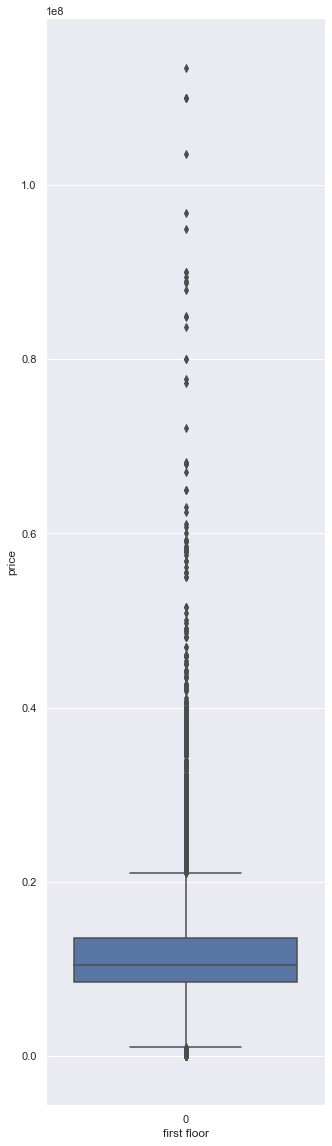

In [84]:
# df_tmp1 = df[df['first floor'] == 1].copy()
# df_tmp1 = df[df['2 <= x <= 5'] == 1].copy()
# df_tmp3 = df[df['6 <= x <= 9'] == 1].copy()
# df_tmp4 = df[df['10 <= x <= 12'] == 1].copy()
# df_tmp5 = df[df['13 <= x <= 17'] == 1].copy()
# df_tmp6 = df[df['18 <= x'] == 1].copy()
# sns.set(rc = {'figure.figsize':(5,20)})
# sns.boxplot(x = df_tmp1['first floor'], y = df_tmp1['price'])

In [35]:
df.columns

Index(['Unnamed: 0', 'price', 'date', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'area', 'kitchen_area',
       'first floor', '2 <= x <= 5', '6 <= x <= 9', '10 <= x <= 12',
       '13 <= x <= 17', '18 <= x', 'level_prop', 'new', 'old', 'Other',
       'Panel', 'Monolithic', 'Brick', 'Blocky', 'Wooden', 'metro',
       'distance_metro'],
      dtype='object')

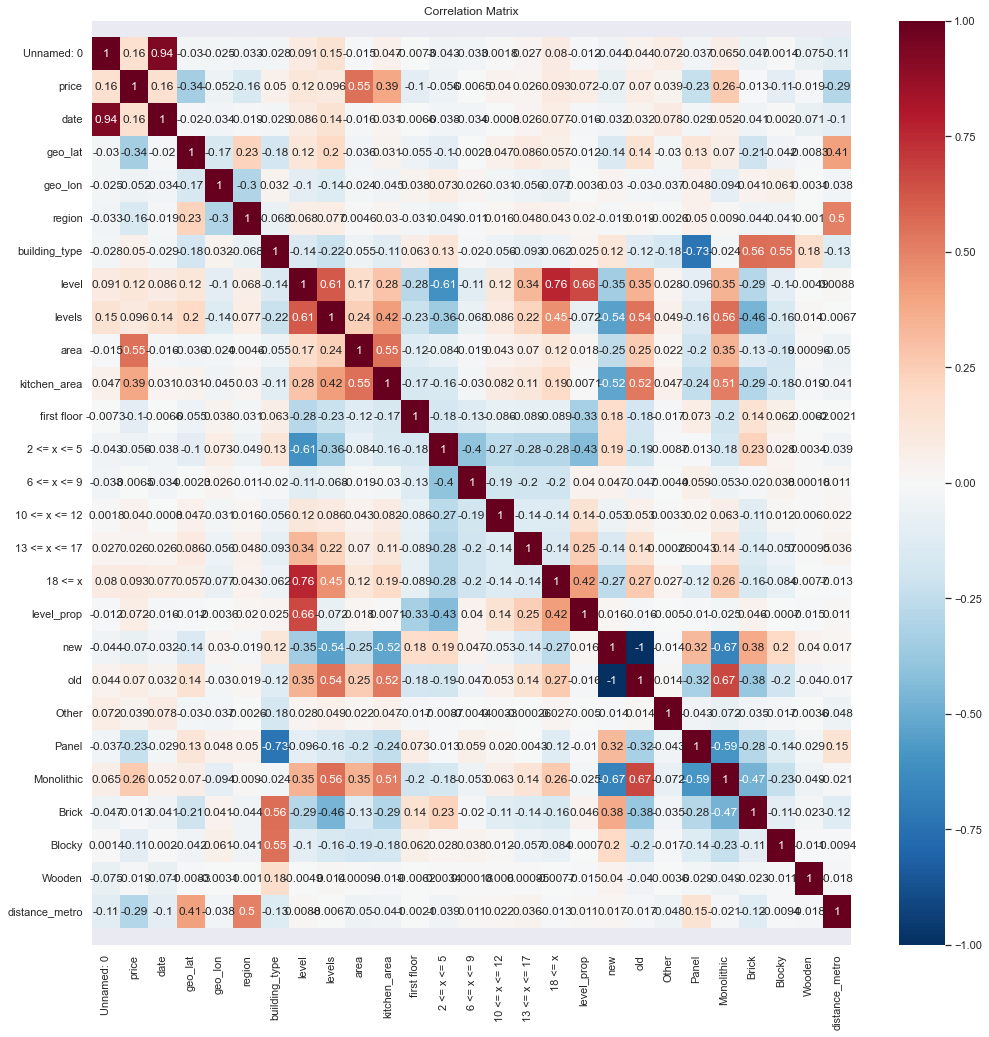

In [36]:
correlation = df.corr()
sns.set(rc = {'figure.figsize':(17,17)})
ax = sns.heatmap(correlation, center=0, cmap='RdBu_r', annot = True)
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()


6. Добавлю признак харакатеризиузий принадлженость квартиры ценрта Москва (пределы садового кольца)


In [36]:
df['id_in_sad'] = 0
df['id_in_sad'] = df.apply(lambda x: inSad(x['geo_lat'], x['geo_lon']), axis =  1)


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<AxesSubplot:ylabel='id_in_sad'>

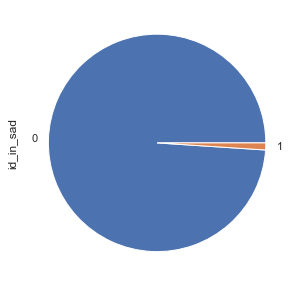

In [37]:
df['id_in_sad'].value_counts().plot(kind = 'pie', figsize=(5,5))

In [38]:
df.drop('region', axis = 1, inplace = True)
df.head(10)


Unnamed: 0     price  date      time    geo_lat    geo_lon  building_type  \
0         150   8806100  2018  07:43:24  55.872870  37.593110              1   
1         384  13293000  2018  01:23:56  55.790968  37.475395              2   
2        1536  10600000  2018  05:41:24  55.813353  37.632791              3   
3        1938  14250000  2018  09:16:01  55.806940  37.646392              2   
4        1942  11990000  2018  09:16:59  55.808834  37.649427              2   
5        2039   7300000  2018  09:37:59  55.880666  37.686428              3   
6        2108  15990000  2018  09:52:11  55.795249  37.525945              2   
7        2109  19000000  2018  09:52:11  55.795249  37.525945              2   
8        2112  15200000  2018  09:52:11  55.809934  37.727885              2   
9        2298   8150000  2018  10:38:17  55.815681  37.491817              3   

   level  levels  rooms  area  kitchen_area  first floor  2 <= x <= 5  \
0      5      24      2  53.5          18.5            0            1   
1      3      14      2  64.4          14.0            0            1   
2      2       8      2  67.0           8.0            0            1   
3      6      12      2  69.0          13.0            0            0   
4      3       9      2  60.0          13.0            0            1   
5      1       9      2  50.0           7.0            1            0   
6      8      15      2  54.4           6.0            0            0   
7      3      15      2  74.2          13.5            0            1   
8     20      30      2  64.0          12.0            0            0   
9      3       3      2  49.0           8.0            0            1   

   6 <= x <= 9  10 <= x <= 12  13 <= x <= 17  18 <= x  level_prop  new  old  \
0            0              0              0        0    0.208333    0    1   
1            0              0              0        0    0.214286    0    1   
2            0              0              0        0    0.250000    1    0   
3            1              0              0        0    0.500000    0    1   
4            0              0              0        0    0.333333    0    1   
5            0              0              0        0    0.111111    1    0   
6            1              0              0        0    0.533333    0    1   
7            0              0              0        0    0.200000    0    1   
8            0              0              0        1    0.666667    1    0   
9            0              0              0        0    1.000000    1    0   

   Other  Panel  Monolithic  Brick  Blocky  Wooden  \
0      0      1           0      0       0       0   
1      0      0           1      0       0       0   
2      0      0           0      1       0       0   
3      0      0           1      0       0       0   
4      0      0           1      0       0       0   
5      0      0           0      1       0       0   
6      0      0           1      0       0       0   
7      0      0           1      0       0       0   
8      0      0           1      0       0       0   
9      0      0           0      1       0       0   

                distance_to_metro                  metro  id_in_sad  
0              (1287, 'Отрадное')               Отрадное          0  
1      (1180, 'Октябрьское_Поле')       Октябрьское_Поле          0  
2           (627, 'Алексеевская')           Алексеевская          0  
3           (518, 'Алексеевская')           Алексеевская          0  
4           (661, 'Алексеевская')           Алексеевская          0  
5            (1729, 'Медведково')             Медведково          0  
6               (705, 'Аэропорт')               Аэропорт          0  
7               (705, 'Аэропорт')               Аэропорт          0  
8  (663, 'Бульвар_Рокоссовского')  Бульвар_Рокоссовского          0  
9              (383, 'Стрешнево')              Стрешнево          0

In [39]:
df.to_csv('prepared_data_v3.csv')